In [4]:
%matplotlib inline

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pylab import imread
import os

# NumPy - *Num*eric *Py*thon

When dealing with large amounts of numbers, we can use specialized packages like NumPy to make writing and executing code much faster. Typically, if we have a bunch of numbers we will want to perform the same operation or mathematical function on large swaths of data. While we can do this in standard Python, of course, NumPy is able to ***vectorize*** the operations, running them hundreds or thousands of times faster.

Much of Numpy is implemented to match MATLAB: if you know how use MATLAB, check out [NumPy for MATLAB users](http://wiki.scipy.org/NumPy_for_Matlab_Users) on how to translate your knowledge. `ones`, `size` and `linspace` are all here.

## Easier to Write
In mathematics, equations are commonly written where it's implicit that they will be applied to all your data: there aren't `for` loops.

Matrix operations (which operate on 'tables' of data and can perform unique calculations at every coordinate) are also commonly written as though they're just multiplication and addition. If I want to double the value of everything in a matrix $\mathbf{A}$, I simply write $2 \times \mathbf{A}$ and that would do (as an example):

$$2 \times \begin{bmatrix}1 & 2\\3 & 4\end{bmatrix} = \begin{bmatrix}2 & 4\\6 & 8\end{bmatrix}$$

## Faster to Run

When you watch an HD YouTube video, the 1-10 megabit per second stream your computer downloads is decompressed into a 1-10 **gigabit** per second raw video stream using some fairly complicated math. 

However, ever since the Intel Pentium with [MMX](https://en.wikipedia.org/wiki/MMX_%28instruction_set%29), debuting in 1997, processors have had special instructions (methods of operating) that efficiently process multiple chunks of data with a single command. These [single-instruction, multiple-data (SIMD)](https://en.wikipedia.org/wiki/SIMD) instructions have been continually expanded ever since to accomodate the types of math (video processing and encryption) we expect our devices to do.

![](https://upload.wikimedia.org/wikipedia/en/d/d5/PentiumMMX-presslogo.jpg)

In [6]:
odds = [1, 3, 5, 7, 9, 11, 13, 15]
odds = np.array(odds)
# evens = ?

In [7]:
# Standard Python
evens = []
for x in odds:
    evens.append(x + 1)

other_evens = [2 * x for x in odds]
    
print(evens)
print(other_evens)

[2, 4, 6, 8, 10, 12, 14, 16]
[2, 6, 10, 14, 18, 22, 26, 30]


In [8]:
# Numpy
evens = odds + 1
other_evens = 2 * odds

print(evens)
print(other_evens)

[ 2  4  6  8 10 12 14 16]
[ 2  6 10 14 18 22 26 30]


# NumPy arrays - `np.array()`

## Your data has a dimension

### 1-D data structures

Examples:

 * (univariate) time-series
 * lists

time-series data:
[ 0.10267309  0.09598732  0.03950023 ..., -0.62880063 -0.85154834
 -0.69398739]

time-series representation:


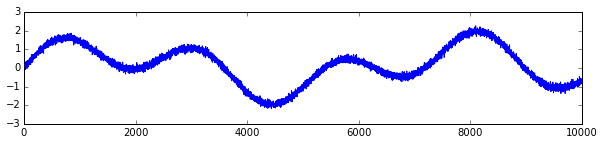

In [9]:
t = np.linspace(0, 10, 10000)
timeseries = np.sin(t) + np.sin(t*2.5) + np.random.normal(0, 0.1, size=10000)
print('time-series data:')
print(timeseries)

print()

print('time-series representation:')
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(timeseries)
plt.show()

In [10]:
timeseries[0]

0.10267309422970571

### 2-D data structures

Examples:

* multivariate time-series
* spreadsheets
* (monochrome) images

image data:
[[[ 0.72941178  0.72941178  0.72941178  1.        ]
  [ 0.72156864  0.72156864  0.72156864  1.        ]
  [ 0.73333335  0.73333335  0.73333335  1.        ]
  ..., 
  [ 0.66274512  0.66274512  0.66274512  1.        ]
  [ 0.65098041  0.65098041  0.65098041  1.        ]
  [ 0.65098041  0.65098041  0.65098041  1.        ]]

 [[ 0.71764708  0.71764708  0.71764708  1.        ]
  [ 0.72156864  0.72156864  0.72156864  1.        ]
  [ 0.72941178  0.72941178  0.72941178  1.        ]
  ..., 
  [ 0.66666669  0.66666669  0.66666669  1.        ]
  [ 0.65882355  0.65882355  0.65882355  1.        ]
  [ 0.65882355  0.65882355  0.65882355  1.        ]]

 [[ 0.72941178  0.72941178  0.72941178  1.        ]
  [ 0.72941178  0.72941178  0.72941178  1.        ]
  [ 0.73333335  0.73333335  0.73333335  1.        ]
  ..., 
  [ 0.66274512  0.66274512  0.66274512  1.        ]
  [ 0.65882355  0.65882355  0.65882355  1.        ]
  [ 0.65882355  0.65882355  0.65882355  1.        ]]

 ..., 
 [[ 0.55686277 

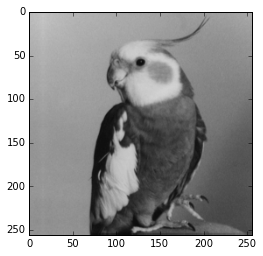

In [13]:
bird = imread(os.path.join('..', 'Data', 'bird.png'))
print('image data:')
print(bird)

print()

print('image representation:')
plt.imshow(bird, cmap=cm.gray)
plt.show()

In [14]:
bird[20, 50]

array([ 0.6901961,  0.6901961,  0.6901961,  1.       ], dtype=float32)

### 3-D data structures

Examples:

* color images
* (monochrome) videos
* panel data

split representation:


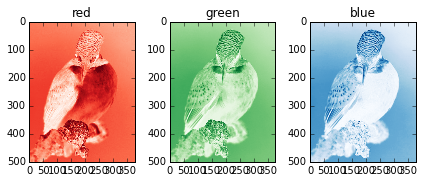

combined representation:


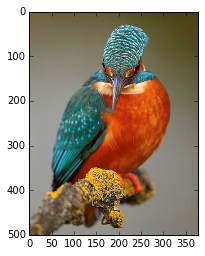

In [20]:
bird2 = imread(os.path.join('..', 'Data', 'color_bird.png'))

print('split representation:')

fig, ax = plt.subplots(nrows=1, ncols=3)
cmaps = [cm.Reds, cm.Greens, cm.Blues]
labels = ['red', 'green', 'blue']

for i in range(3):
    ax[i].imshow(bird2[:,:,i], cmap=cmaps[i])
    ax[i].set_title(labels[i])
    
plt.tight_layout()
plt.show()

print('combined representation:')
plt.imshow(bird2)
plt.show()

In [ ]:
bird2[400, 10, 0]

In [ ]:
print('time series:', type(timeseries))
print('bird 1:', type(bird))
print('bird 2:', type(bird2))

# Why use NumPy?

**Exercise 1**: Add together all values in *list_of_lists*

In [ ]:
list_of_lists = [[10, 12, 32], [19, 25, 15]]
print(list_of_lists)

# Hint: use a for loop inside another for loop

**Exercise 2**: Plot a sine wave using $x$ values between 0 and 20

In [ ]:
x = list(range(20))
print('x:')
print(x)

# Hint 1: use math.sin() to make y values then plot.
y = []

#plt.plot(x, y)

### How to store data using NumPy

In [ ]:
fuits_1d = np.array([1.5, 3.2, 0.99])

print('array:')
print(fuits_1d)
print('dtype:', fuits_1d.dtype)
print('shape:', fuits_1d.shape)
print()
print('min:', np.min(fuits_1d))
print('mean:', np.mean(fuits_1d))
print('max:', np.max(fuits_1d))

In [ ]:
fuits_1d[0]

In [ ]:
# rows = stores
# columns = fruits
# values = prices

fruits_2d = np.array([[1.5, 3.2, 0.99],
                      [1.7, 3.3, 0.75]])

print('array:')
print(fruits_2d)
print('dtype:', fruits_2d.dtype)
print('shape:', fruits_2d.shape)
print()
print('min:', np.min(fruits_2d))
print('mean:', np.mean(fruits_2d))
print('max:', np.max(fruits_2d))

In [ ]:
fruits_2d[0]

In [ ]:
fruits_3d = np.array([[[1.5, 3.2, 0.99],
                      [1.7, 3.3, 0.75],],
                      
                      [[1.5, 3.0, 0.97],
                      [1.8, 3.1, 0.81]]])

**Socrative Questions 1 - 5**

### NumPy arrays use different data types
...and the type is immutable

Reference: http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html

**Golden Rule of Numpy Types:** If the types are different, don't put them in the same array

Important Types:

* `bool`
* `int`
* `float`

All NumPy Types:

* Booleans: `bool_`
* Integers: `int8`, `int16`, `int32`, `int64`
* Unsigned Integers: `uint8`, `uint16`, `uint32`, `uint64`
* Floating Points: `float16`, `float32`, `float64`, `float128`
* Complex Numbers: `complex64`, `complex128`, `complex256`
* Other: `str_`, `datetime64`, `timedelta64`, `object_`, `bytes_`, `void`

In [ ]:
array_a = np.array([True, True, False])

print('array:', array_a)
print('array dtype:', array_a.dtype)
print('element type:', type(array_a[1]))

In [ ]:
array_b = np.array([1, 2, 6])

print('array:', array_b)
print('array dtype:', array_b.dtype)
print('element type:', type(array_b[1]))

In [ ]:
array_c = np.array([1.0, 2.7, 6.3])
print('array:', array_c)
print('array dtype:', array_c.dtype)
print('element type:', type(array_c[0]))

In [ ]:
array_d = np.array(['A', 'B', 'C'])
print('array:', array_d)
print('array dtype:', array_d.dtype)
print('element type:', type(array_d[0]))

***Socrative Questions 6, 7***

## Reshaping Numpy Arrays
`shape` is immutable, but new arrays can be created with a new shape

Useful shape related functions:

* [`array.reshape()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html): change the shape of an array
* [`array.ravel()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html): turn array into 1-D array

In [ ]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11])

print('array:')
print(arr)
print('dtype:', arr.dtype)
print('shape:', arr.shape)

In [ ]:
arr2 = arr.reshape(2, 6)

print('array:')
print(arr2)
print()
print('dtype:', arr2.dtype)
print('shape:', arr2.shape)

***Socrative Questions 8, 9, 10***

## Arrays vs. Lists

1-D arrays are very similar to lists, with a couple key differences

In [ ]:
a_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

an_array = np.array(a_list)

print(a_list, type(a_list))
print(an_array, type(an_array))

In [ ]:
print(a_list[1:5])
print(an_array[1:5])

In [ ]:
for i in a_list[5:8]:
    print(i)
    
print()

for i in an_array[5:8]:
    print(i)

In [ ]:
print('list contents:')
for i in a_list[:2]:
    print(i, type(i))

print('\narray contents:')
for i in an_array[:2]:
    print(i, type(i))

***Socrative Questions 11, 12***

## Making Common Arrays

There are many functions provided to make common arrays

Common 1-D arrays:
* [`np.arange()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) - Sequential numbers
* [`np.linspace()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) - Linearly-spaced values
* [`np.logspace()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html) - Logarithmically-spaced values

Common square arrays:
* [`np.identity()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html) - Identity matrix

Common arbitrarily-shaped arrays:
* [`np.ones()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) - All 1's
* [`np.zeros()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) - All 0's
* [`np.random.random()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html) - Random numbers from 0 to 1

In [ ]:
d = np.linspace(0,10.5, 6)
print('array:', d)
print('shape:', d.shape)
print('dtype:',d.dtype)

In [ ]:
a = np.ones((5,4))

print('array:')
print(a)
print('shape:', a.shape)
print('dtype:', a.dtype)

In [ ]:
rand_array = np.random.random(size=(2,5))

print('array:')
print(rand_array)
print('shape:', rand_array.shape)
print('sum:', rand_array.sum())
print('mean:', rand_array.mean())
print('std:', rand_array.std())

plt.pcolormesh(rand_array)
plt.show()

***Socrative Questions 14, 15***

### Mathematical Functions in NumPy

NumPy has a lot of functions that operate on a single array

* `np.abs()`, `np.sign()`
* `np.sqrt()`: Square root
* `np.log()`: Natural logarithm
* `np.log10()`: Log base-10
* `np.exp()`: $e^x$

Trigonometry:

* `np.sin()`, `np.cos()`, `np.tan()`
* `np.arcsin()`, `np.arccos()`, `arctan()`
* `np.sinh()`, `np.cosh()`, `np.tanh()`
* `np.arcsinh()`, `np.arccosh()`, `np.arctanh()`

NumPy also has many functions that operate on two or more arrays:

* [`np.dot()`][dot]: Dot product
* [`np.cross()`][cross]: Cross product
* [`np.correlate()`][corr]: Cross-correlation of two 1-dimensional sequences

... many more

[dot]:  http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
[cross]:http://docs.scipy.org/doc/numpy/reference/generated/numpy.cross.html
[corr]: http://docs.scipy.org/doc/numpy/reference/generated/numpy.correlate.html

In [ ]:
x = np.linspace(start=0, stop=20, num=10000)
print('x shape:', x.shape)

y_cos = np.cos(x)
y_sin = np.sin(x)

print('shape:', y_cos.shape)
print('shape:', y_sin.shape)

plt.plot(x, y_cos)
plt.plot(x, y_sin)
plt.show()

In [ ]:
t = np.linspace(0, 100, 1000)

x = np.cos(t)
y = np.sin(x) * x * t
plt.plot(x, y, alpha=0.4)

## Array Operations

way, way faster than iterating through an array

In [ ]:
alice_biking = np.array([19.72, 20.34, 21.30, 17.26, 32.89, 23.44]).reshape(2, 3)
alice_biking

In [ ]:
bob_biking = np.array([ 19.38,   28.50,  21.72, 28.55,  29.71,  18.00]).reshape(2, 3)
bob_biking

In [ ]:
alice_biking - bob_biking

##### convert numeric arrays to boolean arrays

In [ ]:
alice_biking > bob_biking

In [ ]:
alice_biking > np.mean(alice_biking)

###### boolean arrays suport boolean operations

Boolean Operations:

* `np.logical_not()` = **`~`** (tilde)
* `np.logical_xor()` = **`^`** (carat)  (xor: one but not the other)
* `np.logical_or()` = **`|`** (pipe)  
* `np.logical_and()` = **`&`** (ampersand)     

In [ ]:
alice_good_days = alice_biking < np.mean(alice_biking)
alice_good_days

In [ ]:
bob_good_days = bob_biking < np.mean(bob_biking)
bob_good_days

In [ ]:
np.logical_xor(alice_good_days, bob_good_days)

***Socrative Questions 16-22***

### slicing in multiple dimensions

In [ ]:
a = np.arange(12)

print('full array:')
print(a)

print()

print('array slice:')
print(a[3:])

In [ ]:
alice_biking = np.array([19.72, 20.34, 21.30, 17.26, 32.89, 23.44]).reshape(2, 3)

print('array:')
print(alice_biking)

print('shape:', alice_biking.shape)

In [ ]:
b = alice_biking[:,1:]   # a[rows, columns]

print(b)
print(b.shape)

In [ ]:
print('origional array:')
print(bob_biking)

print()

print('columns reordered:')
print(bob_biking[:,[0,2,1]])

***Socrative Questions 23-26***

### Class Exercise:

** slice the bird array to only include the bird's head **

In [ ]:
bird = imread('bird.png')
print('dtype :', bird.dtype)
print('shape :', bird.shape)

bird_slice = bird[::,::]

plt.imshow(bird_slice, cmap=cm.gray)
plt.show()

## Broadcasting

the term 'broadcasting' is used to describe what happens when you add an array to something that is a different shape 

### General rule of Broadcasting:

An array can be broadcast with a number, a row-shaped array, a column-shaped array

###### broadcast: array and a float (or int)

In [ ]:
a = np.array([1, 2,1, 4]).reshape(2, 2)
b = 5

##### broadcast: 2-D array and 1-D array

In [ ]:
a = np.array([1, 2, 1, 4]).reshape(2, 2)
b = np.array([1, 5]).reshape(1,2)

print(a)
print('+')
print(b)
print('=')
print(a + b)

print()

print('shapes:', a.shape, '+', b.shape, '=', (a + b).shape)

In [ ]:
a = np.array([1, 2, 1, 4, 2, 3]).reshape(2, 3)
b = np.array([1, 5]).reshape(2,1)

print(a)
print('+')
print(b)
print('=')
print(a + b)

print()

print('shapes:', a.shape, '+', b.shape, '=', (a + b).shape)

In [ ]:
a = np.array([[1, 2, 6], [1, 4, 8]])
b = np.array([[1, 2], [5, 6]])
print('shapes:', a.shape, '+', b.shape, '= error')
print()

print(a)
print('+')
print(b)
print('=')
print(a + b)
print()

print('shapes:', a.shape, '+', b.shape, '=', (a + b).shape)

***Socrative Questions 27-31***

# Itterating Through Arrays

possible, but awkward

In [ ]:
array_2d = np.array([[1,2,3], [2,3,4]])

print('array:')
print(array_2d)
print()

print('dtype:', array_2d.dtype)
print('shape:', array_2d.shape)

In [ ]:
for row in array_2d:
    print(row)

In [ ]:
array_3d = np.array([1, 2, 3, 8, 17, 19]).reshape(2, 3, 1)
print('3d array:')
print(array_3d)
print('dtype:', array_3d.dtype)
print('shape:', array_3d.shape)

for row in array_3d:
    print('\nrow:')
    print(row)
    print('row shape:', row.shape)

## Column and Row operations

Many NumPy functions (especially summary statistics) allow you to specify if the operation should be performed on the rows or columns with the `axis` keyword.

Some functions like [`np.concatenate()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html) allow you to make new arrays by sticking existing arrays together

lets refresh our biking data

In [ ]:
alice_biking = np.array([19.72, 20.34, 21.30, 17.26, 32.89, 23.44]).reshape(2, 3)
bob_biking = np.array([ 19.38,   28.50,  21.72, 28.55,  29.71,  18.00]).reshape(2, 3)

In [ ]:
alice_biking - np.mean(alice_biking, axis=1).reshape(2,1)

In [21]:
np.concatenate([alice_biking, bob_biking], axis=0)

NameError: name 'alice_biking' is not defined

# SciPy Tutorial

for all your science needs: http://docs.scipy.org/doc/scipy/reference/tutorial/index.html

Some Modules in SciPy:

* Statistics ([`scipy.stats`][stats])
<br><br>
* Integration ([`scipy.integrate`][int])
* Optimization ([`scipy.optimize`][opt])
* Interpolation ([`scipy.interpolate`][intp])
<br><br>
* Fourier Transforms ([`scipy.fftpack`][fft])
* Signal Processing ([`scipy.signal`][sig])
* Linear Algebra ([`scipy.linalg`][lin])
* Spatial data structures and algorithms ([`scipy.spatial`][spc])
* Multidimensional image processing ([`scipy.ndimage`][img])

[stats]:https://docs.scipy.org/doc/scipy-0.15.1/reference/stats.html
[int]:  https://docs.scipy.org/doc/scipy-0.15.1/reference/integrate.html
[opt]:  https://docs.scipy.org/doc/scipy-0.15.1/reference/optimize.html
[intp]: https://docs.scipy.org/doc/scipy-0.15.1/reference/interpolate.html
[fft]:  https://docs.scipy.org/doc/scipy-0.15.1/reference/fftpack.html
[sig]:  https://docs.scipy.org/doc/scipy-0.15.1/reference/signal.html
[lin]:  https://docs.scipy.org/doc/scipy-0.15.1/reference/linalg.html
[spc]:  https://docs.scipy.org/doc/scipy-0.15.1/reference/spatial.html
[img]:  https://docs.scipy.org/doc/scipy-0.15.1/reference/ndimage.html

## Class Exercise:

**1. Find the point in `random_points` that is closest to `my_point`.**

Do not use iteration; use row/column operations.

In [ ]:
# create points
# the two columns are x and y
# each row is a point

my_point = np.array([0.8, 0.6])
random_points = np.random.random(size=(10, 2))

In [ ]:
# visualize my_point and random points

fig, ax = plt.subplots(figsize=(4,4))
ax.plot([my_point[0]], [my_point[1]], 'o', color='darkred', label='my point')
ax.plot(random_points[:, 0], random_points[:, 1], '.', color='seagreen', label='random points')
ax.legend(loc=(1.1, 0.5))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.show()

**2. Reorder the points in random_points using their distance from my_point.**

Do not use iteration. Try using [`np.argsort()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html) and fancy indexing.

### More NumPy/Array Reading

How arrays are used in image kernels: http://setosa.io/ev/image-kernels/

How to use NumPy and array operations to make Conway's Game of Life: http://www.loria.fr/~rougier/teaching/numpy/numpy.html